In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit, KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [31]:
df_envi = pd.read_csv("../../../DataSet/Envi/envi.csv")

In [32]:
df_envi

,Date,Envi
0,04/01/2015,44562
1,11/01/2015,38112
2,18/01/2015,50355
3,25/01/2015,51922
4,01/02/2015,67496
...,...,...
164,25/02/2018,42116
165,04/03/2018,44454
166,11/03/2018,28399
167,18/03/2018,49145


In [33]:
df_envi["Date"] = pd.to_datetime(df_envi["Date"], unit="ns")
df_envi

,Date,Envi
0,2015-04-01,44562
1,2015-11-01,38112
2,2015-01-18,50355
3,2015-01-25,51922
4,2015-01-02,67496
...,...,...
164,2018-02-25,42116
165,2018-04-03,44454
166,2018-11-03,28399
167,2018-03-18,49145


In [34]:
df_envi["y"] = df_envi["Envi"].shift(-1)
df_envi.dropna(inplace=True)
df_envi

,Date,Envi,y
0,2015-04-01,44562,38112.0
1,2015-11-01,38112,50355.0
2,2015-01-18,50355,51922.0
3,2015-01-25,51922,67496.0
4,2015-01-02,67496,54229.0
...,...,...,...
163,2018-02-18,39773,42116.0
164,2018-02-25,42116,44454.0
165,2018-04-03,44454,28399.0
166,2018-11-03,28399,49145.0


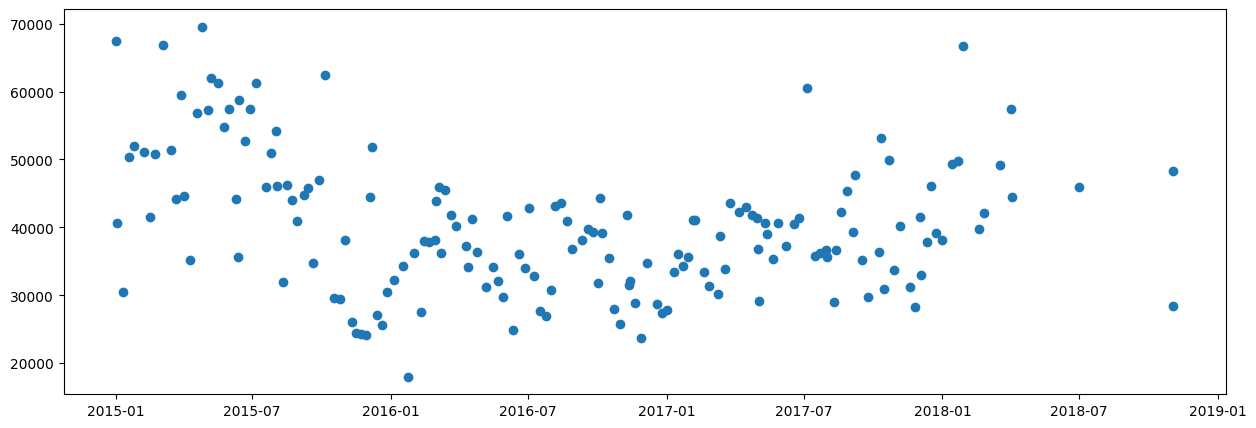

In [35]:
plt.figure(figsize=(15,5))
plt.plot_date(df_envi['Date'],df_envi['Envi'])
plt.show()

In [36]:
# x = np.array(df_envi["Envi"]).reshape(-1, 1)
# y = np.array(df_envi["y"]).reshape(-1, 1)
x = df_envi.drop(['y'], axis=1)
x = x.drop(['Date'],axis=1)

# y = df_envi.drop(['Date'], axis=1)
y = df_envi.drop(['Envi'],axis=1)

In [37]:
score = 1000000
ts = TimeSeriesSplit(n_splits=6)
for train , test  in ts.split(x):
    ml = LinearRegression()
    x_train, x_test = x.iloc[train], x.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

    y_train_value = y_train.drop(['Date'],axis=1)
    y_test_value = y_test.drop(['Date'],axis=1)

    ml.fit(x_train, y_train_value)
    y_predict = ml.predict(x_test)

    if (mae:= mean_absolute_error(y_test_value, y_predict)) < score:
        score = mae
        op_x_train = x_train
        op_x_test = x_test
        op_y_train = y_train
        op_y_test = y_test

print(score)


x_train = op_x_train
y_train = op_y_train
x_test = op_x_test
y_test = op_y_test
# print(y_test)
        
ml = LinearRegression()
ml.fit(x_train,y_train.drop(['Date'],axis=1))
y_predict = ml.predict(x_test)

print(f"Mean Absolute Error: {mean_absolute_error(y_test.drop(['Date'],axis=1), y_predict)}")
print(f"The Mean Square Error: {mean_squared_error(y_test.drop(['Date'],axis=1), y_predict)}")
print(f"The R2 score: {r2_score(y_test.drop(['Date'],axis=1), y_predict)}")


3507.330780630216
Mean Absolute Error: 3507.330780630216
The Mean Square Error: 18022412.166143414
The R2 score: 0.3495875036078304


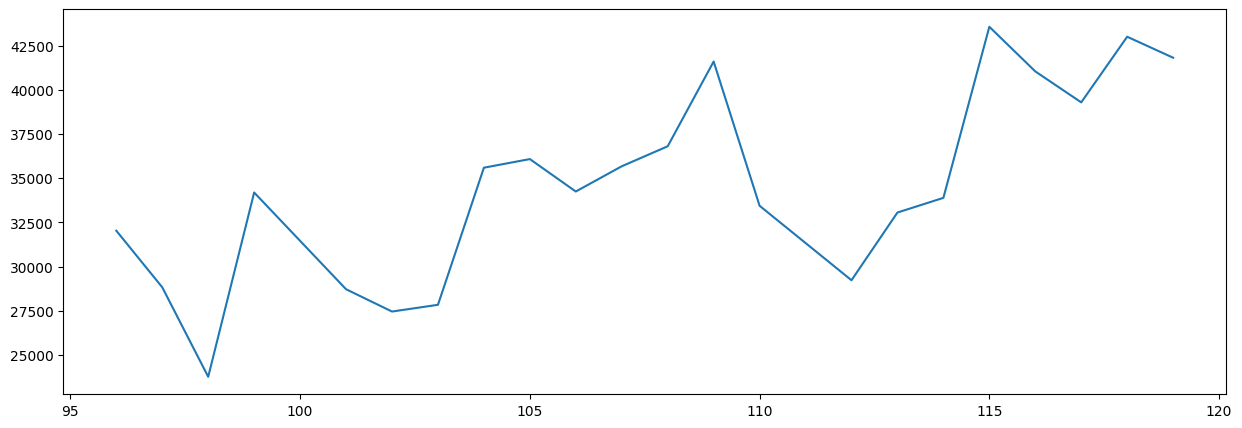

In [38]:
plt.figure(figsize=(15,5))
plt.plot(y_test['y'])

plt.show()